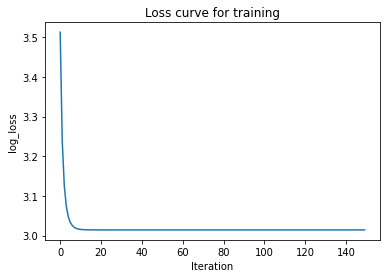

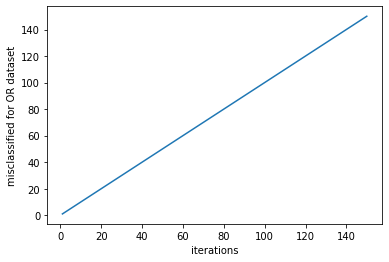

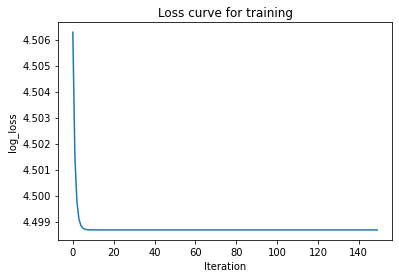

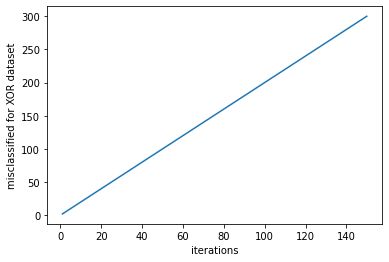

In [11]:
#Reference : https://heartbeat.fritz.ai/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432
#https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65
#https://zerowithdot.com/mlp-backpropagation/
import numpy as np
import random
import matplotlib.pyplot as plt
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[3,4,1], lr=0.01, epoch=150):
        self.params = {}
        self.lr = lr
        self.epoch = epoch
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        for i in  range(self.layers[0]):
            for j in range(self.layers[1]):
                self.params["W1"][i][j] = random.uniform(-0.01, 0.01)    #weights between -0.01 and 0.01
        self.params['b1']  = np.random.randint(1,2,size = (self.layers[1],))

        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        for i in  range(self.layers[1]):
            for j in range(self.layers[2]):
                self.params["W2"][i][j] = random.uniform(-0.01, 0.01)   #weights between -0.01 and 0.01
        
        self.params['b2'] = np.random.randint(1,2,size = (self.layers[2],))


    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

#Sigmoid Activation function
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        Z1 = np.dot(self.X, self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat
        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = np.dot(dl_wrt_yhat, dl_wrt_sig)

        dl_wrt_A1 = np.dot(dl_wrt_z2, self.params['W2'].T)
        dl_wrt_w2 = np.dot(self.params['A1'].T, dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.params['A1']*(1-self.params['A1'])
        dl_wrt_w1 = np.dot(self.X.T, dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.lr * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.lr * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.lr * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.lr * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias
        misclassified_ = [] 
        misclassified = 0


        for i in range(self.epoch):
            
            yhat, loss = self.forward_propagation()
            for i in range(yhat.shape[0]):
                if np.round(yhat[i][0])-y[i] != 0:
                    misclassified += 1
            misclassified_.append(misclassified)
            self.back_propagation(yhat)
            self.loss.append(loss)
        return misclassified_

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = np.dot(X, self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("log_loss")
        plt.title("Loss curve for training")
        plt.show()
        
#OR dataset      
training_inputs = []
training_inputs_or = np.array([[1, 1, 1],
        [1, 1, -1],
        [1, -1, 1],
        [1, -1, -1],
        [-1, 1, 1],
        [-1, 1, -1],
        [-1, -1, 1],
        [-1, -1, -1]])

labels_or = np.array([1, 1, 1, 1, 1, 1, 1, 0])

neu_net_or = NeuralNet()

misclassified_ = neu_net_or.fit(training_inputs_or, labels_or)

neu_net_or.plot_loss()

iterations = np.arange(1, 150+1)
plt.plot(iterations, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified for OR dataset')
plt.show()


#XOR dataset
training_inputs_xor = np.array([[1, 1, 1],
        [1, 1, -1],
        [1, -1, 1],
        [1, -1, -1],
        [-1, 1, 1],
        [-1, 1, -1],
        [-1, -1, 1],
        [-1, -1, -1]])

labels_xor = np.array([0, 1, 1, 1, 1, 1, 1, 0])

neu_net_xor = NeuralNet()

misclassified_ = neu_net_xor.fit(training_inputs_xor, labels_xor)

neu_net_xor.plot_loss()

iterations = np.arange(1, 150+1)
plt.plot(iterations, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified for XOR dataset')
plt.show()
